# 의사 결정 나무 회귀 실습

In [1]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeRegressor

In [2]:
# 회귀 데이터 가져오기
df = pd.read_csv('/mnt/elice/dataset/boston.csv')
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,NaN,7.07,NaN,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,NaN,7.07,NaN,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,NaN,2.18,NaN,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,NaN,2.18,NaN,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,NaN,11.93,NaN,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,NaN,11.93,NaN,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,NaN,11.93,NaN,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,NaN,11.93,NaN,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# 컬럼별 데이터 개수 및 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          134 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        35 non-null     float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  target      506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [4]:
# 결측치 처리 (숫자형이라서 0으로 채운다)
df['ZN'] = df['ZN'].fillna(0)
df['CHAS'] = df['CHAS'].fillna(0)

In [5]:
# 불필요한 컬럼 제거
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
# 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
Y # 연속형 > 회귀 모델 사용

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [8]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [9]:
# 모델 생성
model = DecisionTreeRegressor() 

In [10]:
# 모델 학습
model.fit(x_train, y_train) # 학습용 데이터만 사용

DecisionTreeRegressor()

In [11]:
# 모델 평가 (R Squared)
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

# 학습 데이터 성능이 1.0 -> 확실한 과대 적합!

학습 데이터 성능 : 1.0
평가 데이터 성능 : 0.6564343373361308


In [12]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([22.2, 24.7, 22.7, 16.3, 20.8, 20.3, 20.6, 19. , 15.3, 16.1, 10.8,
       17.9, 14.2,  8.8, 50. , 37. , 21.4, 34.6, 22.8, 19.6, 24.7, 19.6,
       20.1, 24.2, 23.1, 10.9, 17.5, 17.8, 39.8, 18.8, 14.1, 19.1, 24.5,
       22.2, 22.2, 22.6, 10.2, 22.6, 12.5, 17.9, 23.9, 24.5, 22. , 14.1,
       20.1, 19. , 22.5, 13.6, 13.8, 28.4, 13.1, 19.8, 24. , 35.2, 13.9,
       18.9, 19.4, 17.5, 10.9, 22.4, 20.6, 23.1, 29.6, 22.8, 23.2, 24. ,
       18.4, 18.9, 10.4, 22.2, 20.8, 22.2, 24.8, 30.1, 26.5,  7.2, 41.7,
       22.5, 22. , 24.5, 30.1, 17.5, 21.4, 37.6, 37.6, 25. , 20.6, 13.8,
       24.3, 12.7, 16.6, 11.8, 20.6, 30.1, 21.1, 24.5, 11.9, 23.1, 14.3,
       16. , 25. , 20.1, 33.8, 24.7, 21. , 18.9,  7.5, 15.3, 23.9, 22.2,
       34.9, 17.9, 18.9, 19.8, 18.5, 22. ,  7.5, 18.4, 10.2, 50. , 30.1,
        7.2, 14.4, 21.2, 25. , 20.5, 36.2])

In [13]:
# 최대 깊이 조절 -> 과대 적합 완화
model = DecisionTreeRegressor(max_depth=10)
model.fit(x_train, y_train)
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.9941113192452342
평가 데이터 성능 : 0.6413214559106717


In [14]:
# 특성 중요도 조회
model.feature_importances_

array([3.41751244e-02, 4.11494929e-03, 1.04609449e-02, 2.86234936e-05,
       1.10977474e-02, 2.41882500e-01, 5.76401849e-03, 5.24248517e-02,
       1.39042041e-03, 1.24929921e-02, 3.08380460e-02, 6.31679957e-03,
       5.89012983e-01])

<AxesSubplot: >

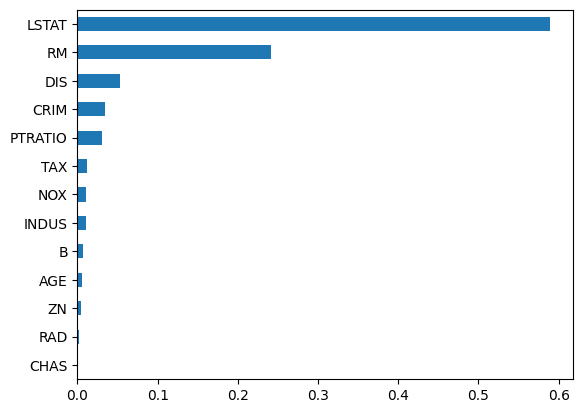

In [15]:
# 특성 중요도 시각화 (학습시키는 데이터에 따라 달라진다.)
fi = pd.Series(model.feature_importances_, index=model.feature_names_in_)
fi[fi != 0].sort_values().plot(kind='barh')

# 의사 결정 나무 시각화

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(
    model,
    out_file='model.dot',
    feature_names=model.feature_names_in_,
    impurity=True
)

In [17]:
import graphviz
with open('model.dot') as f:
    data = f.read()
graphviz.Source(data).render('model')

'model.pdf'

## 제출

제출을 위해 새로 불러온 `boston.csv` 데이터를 통해 회귀를 위한 Decision Tree 모델을 만들고 학습한 이후 학습 데이터의 score와 테스트 데이터의 score를 아래와 같은 dictionary로 만들어 `result`에 저장하세요.
- `{"train": 0.123, "test": 0.456}`
- Decision Tree 모델을 생성할 때 **반드시 `random_state=SEED`를 추가해야 합니다.** 이를 추가하지 않으면 제대로 채점되지 않습니다.

In [30]:
# SEED 값 바꾸면 제대로 채점되지 않을 수 있습니다.
SEED = 2023

df = pd.read_csv('/mnt/elice/dataset/boston.csv')
df['ZN'] = df['ZN'].fillna(0)
df['CHAS'] = df['CHAS'].fillna(0)
df.drop('Unnamed: 0', axis=1, inplace=True)

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = SEED)

# TODO: Decision Tree 모델을 학습하세요.
model = DecisionTreeRegressor(random_state = SEED).fit(x_train, y_train)
result = {
    "train": model.score(x_train, y_train),
    "test": model.score(x_test, y_test),
}

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [31]:
import os
import json

assert isinstance(result, dict), \
    "'result' 변수에 요구사항에 맞는 dictionary가 저장되어 있는지 확인하세요."

with open('result.json', 'w') as f:
    json.dump(result, f)

os.system('elice_grade result.json cds_ai_exercise.ipynb')

send files ['result.json', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 1.873 seconds
=== Message ===
제출 완료되었습니다.


0